In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [58]:
def physStep(t0, t1, a0, v0, x0):
    x1 = 0
    v1 = 0
    a1 = 0
    
    lx = 1000
    lv = 1000
    la = 1000
    
    exhaustVelocity = 9154.2
    densityCoefficient = 0.076474252
    gravity = 32.174
    Tb = 288.15
    M0 = 191.5  # wet mass
    mdot = 3.51
    while (np.abs(lx-x1) > 1e-6) and (np.abs(lv-v1) > 1e-6) and (np.abs(la-a1) > 1e-6):
        lx = x1
        lv = v1
        la = a1
        dv = (exhaustVelocity*np.log(M0/(M0 - mdot*t1)) - gravity*t1 -
              (exhaustVelocity*np.log(M0/(M0 - mdot*t0)) - gravity*t0))
        da = a0 + dv / (t1-t0)
        v1 = v0 + dv
        dx = v1 * (t1-t0)
        x1 = x0 + dx
        a1 = a0 + da
        
    return [a1, v1, x1]

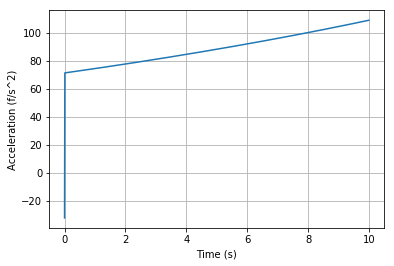

In [62]:
steps = 1000;
burnTime = 9.99  # s
burnLinspace = np.linspace(0,burnTime,steps)
acc = np.zeros([steps]);
vel = np.zeros([steps]);
pos = np.zeros([steps]);

pos[0] = 2066;
acc[0] = -32.174;

for i in range(1,steps):
    [acc[i], vel[i], pos[i]] = physStep((i-1)*10/steps,i*10/steps,acc[0],vel[i-1],pos[i-1]);
    
plt.figure(1)
plt.plot(burnLinspace,acc)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (f/s^2)')
plt.show()
# figure(2)
# plot(linspace(0,burnTime,steps),vel)
# grid()
# xlabel('Time (s)')
# ylabel('Velocity (f/s)')
# figure(3)
# plot(linspace(0,burnTime,steps),pos)
# grid()
# xlabel('Time (s)')
# ylabel('Position (feet)')
# shg()